In [8]:
from IPython.display import display
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
matplotlib.rc('figure', figsize=[10,5])
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])

hr_df = pd.read_csv("C:\\Users\\kelle\\Downloads\\HR_Data\\aug_train.csv")

In [9]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "g-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.xlabel('Number of Training Instances Used')
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()
        
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "g-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().invert_xaxis()
    
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone    

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X.iloc[train_index]
            train_y_folds = train_y.iloc[train_index]
            test_X_fold = train_X.iloc[test_index]
            test_y_fold = train_y.iloc[test_index]
            classifier.fit(train_X_folds.values, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold.values, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds.values, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [10]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [11]:
hr_df['city']=hr_df['city'].astype(str)
hr_df['gender']=hr_df['gender'].astype(str)
hr_df['relevent_experience']=hr_df['relevent_experience'].astype(str)
hr_df['enrolled_university']=hr_df['enrolled_university'].astype(str)
hr_df['education_level']=hr_df['education_level'].astype(str)
hr_df['major_discipline']=hr_df['major_discipline'].astype(str)
hr_df['experience']=hr_df['experience'].astype(str)
hr_df['company_size']=hr_df['company_size'].astype(str)
hr_df['company_type']=hr_df['company_type'].astype(str)
hr_df['last_new_job']=hr_df['last_new_job'].astype(str)
hr_df = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(hr_df)

In [12]:
from sklearn import preprocessing
x = hr_df.values # convert to numpy array
print(x.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled.shape)
hr_df = pd.DataFrame(x_scaled, columns=hr_df.columns)
#hr_df.head()

(19158, 14)
(19158, 14)


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
data_split = StratifiedShuffleSplit(n_splits=1 , test_size=0.3, random_state=30)
for train_ind, test_ind in data_split.split(hr_df, hr_df["target"]):
    strat_train_set = hr_df.loc[train_ind]
    strat_test_set = hr_df.loc[test_ind]
    
train_set = strat_train_set
test_set = strat_test_set

train_y = train_set[["target"]]
train_X = train_set.drop("target", axis=1)
test_y = test_set[["target"]]
test_X = test_set.drop("target", axis=1)

0.7809843400447427
31.423129558563232


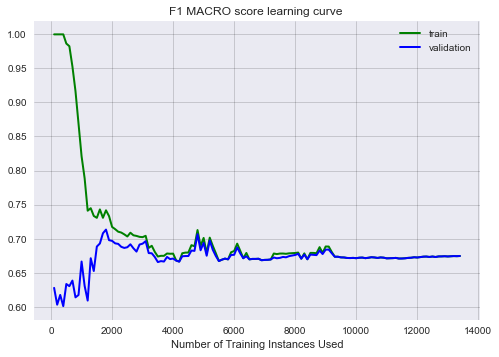

In [19]:
start = time.time()


from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy')
tree_classifier.fit(train_X, train_y)

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
hr_train_predictions = tree_classifier.predict(train_X)
accuracy = accuracy_score(train_y, hr_train_predictions)

print(accuracy)
#f1_score(train_y, bank_train_predictions, average='macro')

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, tree_classifier, f1_score, average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="F1 MACRO score learning curve ")

elapsed = (time.time() - start)

print(elapsed)

In [20]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
tree_classifier.fit(train_X, train_y)
test_predictions = tree_classifier.predict(test_X)
print(classification_report(test_y, test_predictions,digits=4,zero_division=True))
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

         0.0     0.8268    0.9036    0.8635      4315
         1.0     0.5969    0.4299    0.4998      1433

    accuracy                         0.7855      5748
   macro avg     0.7118    0.6667    0.6816      5748
weighted avg     0.7695    0.7855    0.7728      5748

[[3899  416]
 [ 817  616]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished


[1.         1.         0.99949079 0.97824576 0.94098079 0.8897265
 0.83742827 0.80032161 0.77173732 0.75859398 0.74896827 0.74405337
 0.74379713 0.7429428  0.741328   0.73931729 0.73776455 0.73707914
 0.73679673 0.73642448 0.73565191 0.73555021 0.73527767 0.73527767
 0.73527767 0.73497837 0.73435743 0.7341049  0.7341049  0.73216193
 0.73216193 0.72726583 0.72214652 0.72214652 0.72214652 0.72086185
 0.72086185 0.71706567 0.71648523 0.71634554 0.71401883 0.71401883
 0.71401883 0.71389331 0.71389331 0.71389331 0.71389331 0.71389331
 0.71389331 0.71389331] [0.6286563  0.62650047 0.62543784 0.63549849 0.6501032  0.6535261
 0.66416551 0.67902114 0.6952863  0.71365435 0.7171908  0.71908186
 0.72458495 0.72845924 0.73331497 0.7330127  0.73264887 0.7324248
 0.73421119 0.73413132 0.73378539 0.73371394 0.73311025 0.73311025
 0.73311025 0.73270783 0.73142875 0.73112909 0.73112909 0.72971169
 0.72971169 0.7253568  0.7201995  0.7201995  0.7201995  0.71744857
 0.71744857 0.71329085 0.71288405 0.71267

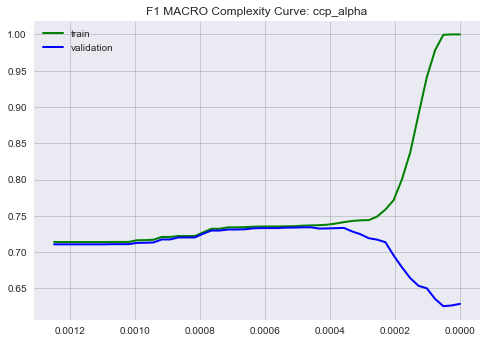

In [25]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0, 0.00125, 50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), train_X, train_y, param_name="ccp_alpha", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_macro', verbose=1, cv=10
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='F1 MACRO Complexity Curve: ccp_alpha')

0.7989560029828486
18.72035264968872


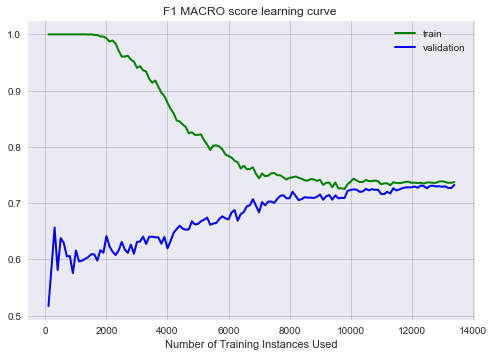

In [28]:
start = time.time()


from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(ccp_alpha=0.0005, criterion='gini')
tree_classifier.fit(train_X, train_y)

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
hr_train_predictions = tree_classifier.predict(train_X)
accuracy = accuracy_score(train_y, hr_train_predictions)

print(accuracy)
#f1_score(train_y, bank_train_predictions, average='macro')

from sklearn.metrics import f1_score
f1_scores = stratFold(train_X, train_y, tree_classifier, f1_score, average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="F1 MACRO score learning curve ")

elapsed = (time.time() - start)

print(elapsed)

In [29]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
tree_classifier.fit(train_X, train_y)
test_predictions = tree_classifier.predict(test_X)
print(classification_report(test_y, test_predictions,digits=4,zero_division=True))
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

         0.0     0.8715    0.8582    0.8648      4315
         1.0     0.5917    0.6190    0.6050      1433

    accuracy                         0.7985      5748
   macro avg     0.7316    0.7386    0.7349      5748
weighted avg     0.8018    0.7985    0.8000      5748

[[3703  612]
 [ 546  887]]
